In [ ]:
import gdown
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Downloading the data

In [ ]:
customerCsv : str = "https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view?usp=sharing"
productsCsv : str = "https://drive.google.com/file/d/1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0/view?usp=sharing"
transactionsCsv : str = "https://drive.google.com/file/d/1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF/view?usp=sharing"

In [ ]:
def download_csv(url : str, outputPath : str) -> None:
  try:
    gdown.download(url, outputPath, quiet=False, fuzzy=True)
    print(f"File downloaded successfully and saved to {outputPath}")
  except Exception as e:
    print(f"Failed to dowload the file {e}")

In [ ]:
download_csv(customerCsv, "/content/")
download_csv(productsCsv, "/content/")
download_csv(transactionsCsv, "/content/")

Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 7.77MB/s]


File downloaded successfully and saved to /content/


Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 3.04MB/s]


File downloaded successfully and saved to /content/


Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 4.00MB/s]

File downloaded successfully and saved to /content/


# Loading the dataset

In [ ]:
dfCustomers = pd.read_csv("/content/Customers.csv")
dfTransactions = pd.read_csv("/content/Transactions.csv")
dfProducts = pd.read_csv("/content/Products.csv")

In [ ]:
dfTransactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
dfProducts.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
dfCustomers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
transactions_products = pd.merge(dfTransactions, dfProducts, on='ProductID', how='left')
df = pd.merge(transactions_products, dfCustomers, on='CustomerID', how='left')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [ ]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_x,0
ProductName,0
Category,0
Price_y,0


In [ ]:
df.duplicated().sum()

0

# Data Cleaning and Preprocessing

In [ ]:
if "Unnamed: 0" in df.columns:
  df = df.drop(columns=["Unnamed: 0"])

In [ ]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors="coerce")
df["SignupDate"] = pd.to_datetime(df["SignupDate"], errors = "coerce")
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')

In [ ]:
duplicates = df.duplicated().sum()
dfCleaned = df.drop_duplicates()

In [ ]:
print(f"Duplicates removed : {duplicates}")
print(f"Cleaned Shape : {dfCleaned.shape}")
print(f"Date Conversion Success: {dfCleaned[['TransactionDate', 'SignupDate']].dtypes.to_dict()}")

Duplicates removed : 0
Cleaned Shape : (1000, 14)
Date Conversion Success: {'TransactionDate': dtype('<M8[ns]'), 'SignupDate': dtype('<M8[ns]')}


# Discriptive Statistics

In [ ]:
dfCleaned.describe()

,TransactionDate,Quantity,TotalValue,Price_x,Price_y,SignupDate
count,1000,1000.000000,1000.000000,1000.00000,1000.00000,1000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,272.55407,2023-07-09 02:49:55.199999744
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,16.08000,2022-01-22 00:00:00
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,147.95000,2022-09-17 12:00:00
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,299.93000,2023-07-23 00:00:00
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,404.40000,2024-04-12 00:00:00
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,497.76000,2024-12-28 00:00:00
std,NaN,1.117981,493.144478,140.73639,140.73639,NaN


In [ ]:
numericDf = df[["Quantity", "TotalValue", "Price_x", "Price_y"]]
numericDf.head()

,Quantity,TotalValue,Price_x,Price_y
0,1,300.68,300.68,300.68
1,1,300.68,300.68,300.68
2,1,300.68,300.68,300.68
3,2,601.36,300.68,300.68
4,3,902.04,300.68,300.68


In [ ]:
numericDf.var()

,0
Quantity,1.249881
TotalValue,243191.475736
Price_x,19806.731365
Price_y,19806.731365


In [ ]:
range = numericDf.max() - numericDf.min()

Quantity         3.00
TotalValue    1974.96
Price_x        481.68
Price_y        481.68
dtype: float64


In [ ]:
q1 = numericDf.quantile(0.25)
q3 = numericDf.quantile(0.75)
iqr = q3 - q1
iqr

,0
Quantity,2.000
TotalValue,716.365
Price_x,256.450
Price_y,256.450


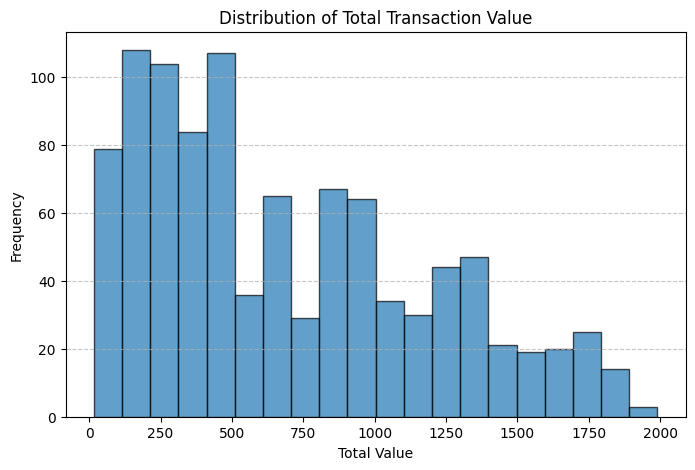

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(dfCleaned['TotalValue'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

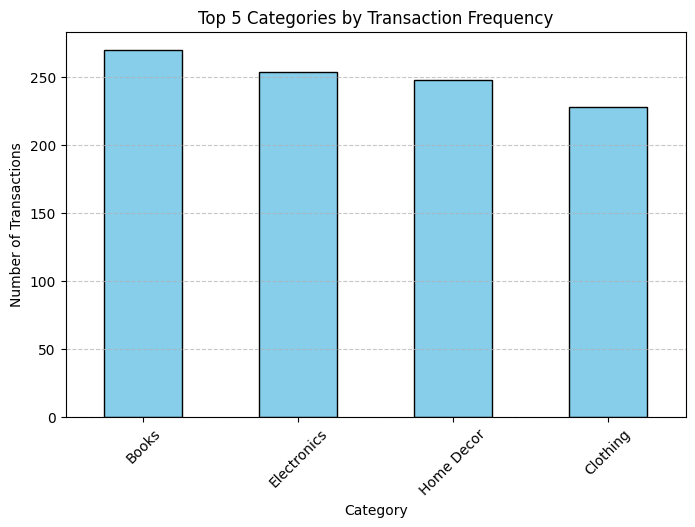

In [ ]:
top_categories = dfCleaned['Category'].value_counts().head(5)

plt.figure(figsize=(8, 5))
top_categories.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Top 5 Categories by Transaction Frequency')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Trend and Correlation Analysis

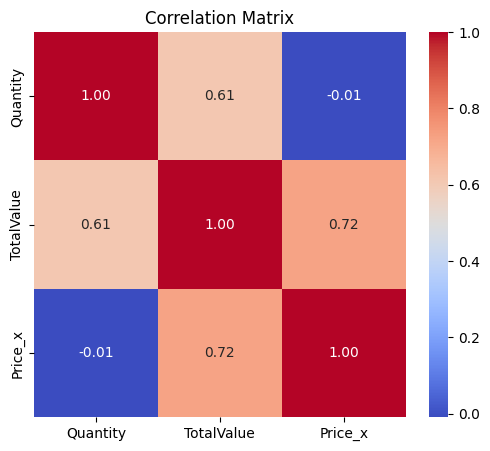

In [ ]:
correlation_matrix = dfCleaned[['Quantity', 'TotalValue', 'Price_x']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
dfCleaned.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


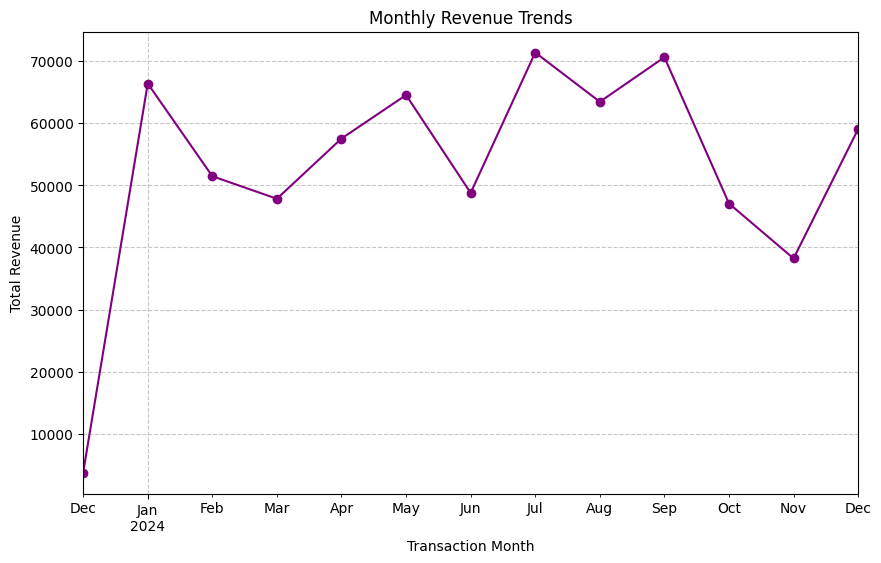

In [ ]:
monthly_revenue_trend = dfCleaned.groupby('TransactionMonth')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
monthly_revenue_trend.plot(kind='line', marker='o', linestyle='-', color='purple')
plt.title('Monthly Revenue Trends')
plt.xlabel('Transaction Month')
plt.ylabel('Total Revenue')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

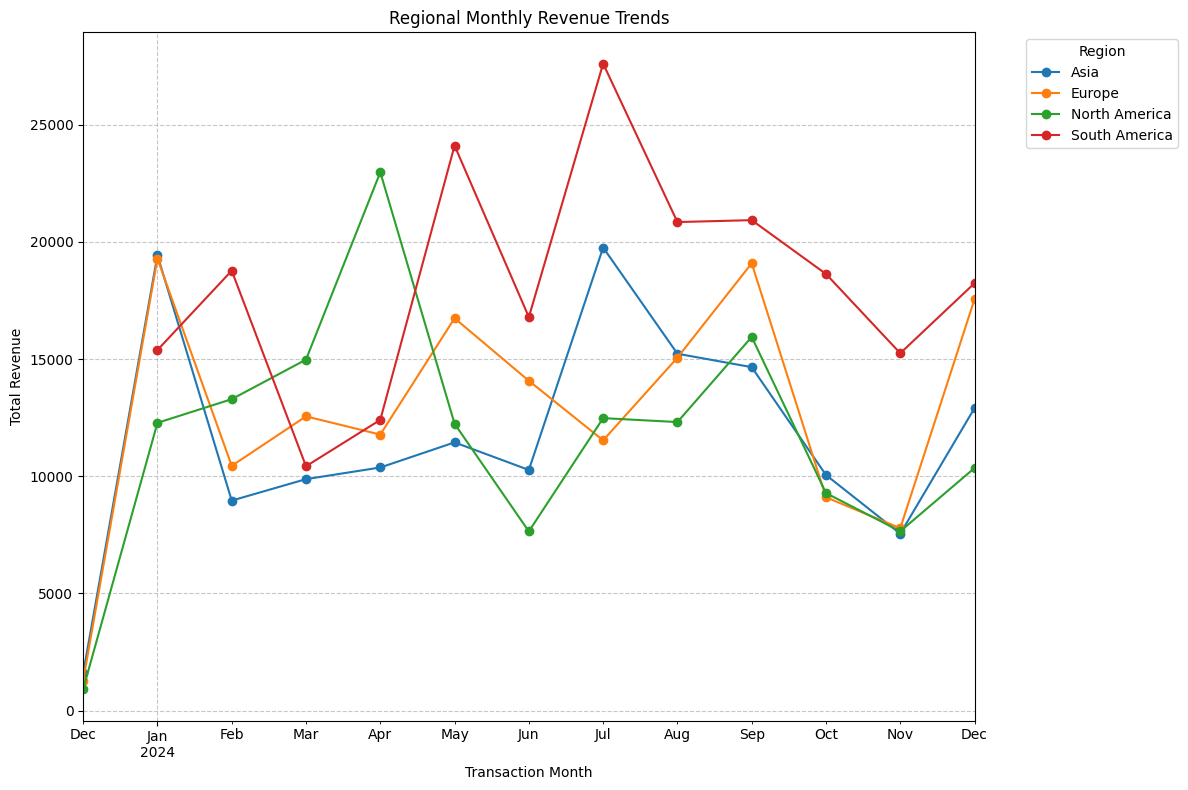

In [ ]:
regional_revenue_trend = dfCleaned.groupby(['Region', 'TransactionMonth'])['TotalValue'].sum().unstack()

regional_revenue_trend.T.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Regional Monthly Revenue Trends')
plt.xlabel('Transaction Month')
plt.ylabel('Total Revenue')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Segmentation and Group Analysis

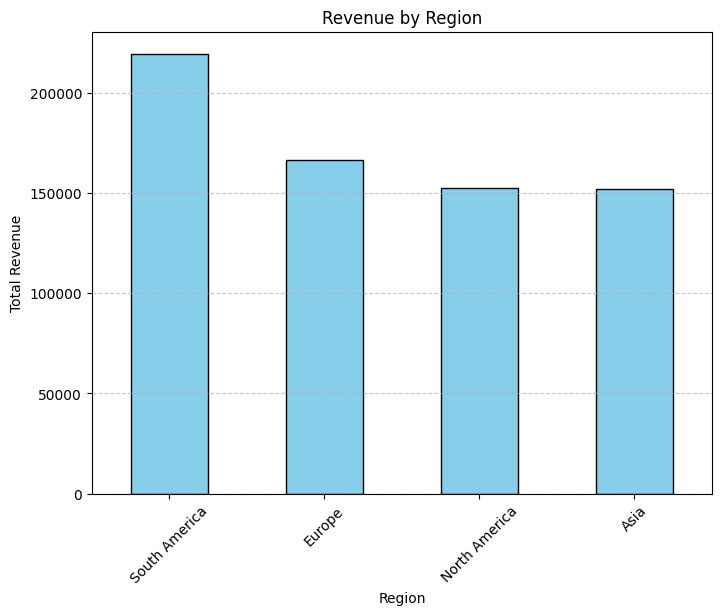

In [ ]:
region_revenue = dfCleaned.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_transaction_count = dfCleaned['Region'].value_counts()

plt.figure(figsize=(8, 6))
region_revenue.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

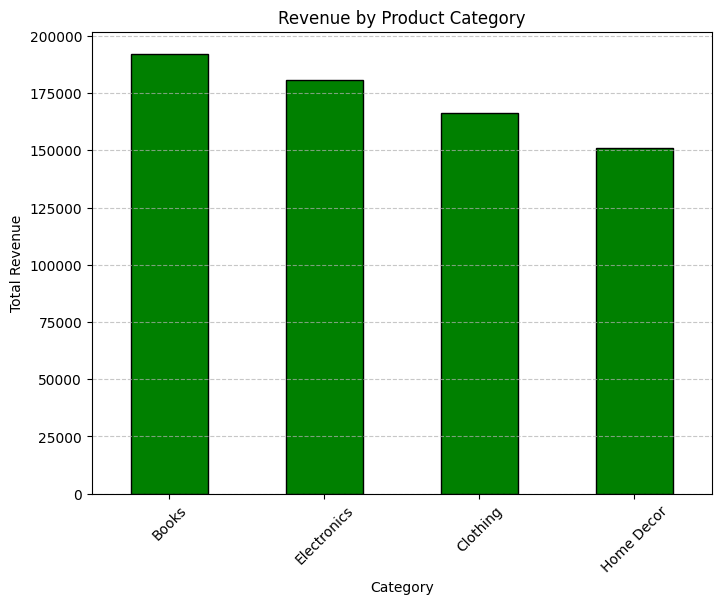

In [ ]:
category_revenue = dfCleaned.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_transaction_count = dfCleaned['Category'].value_counts()

plt.figure(figsize=(8, 6))
category_revenue.plot(kind='bar', color='green', edgecolor='k')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

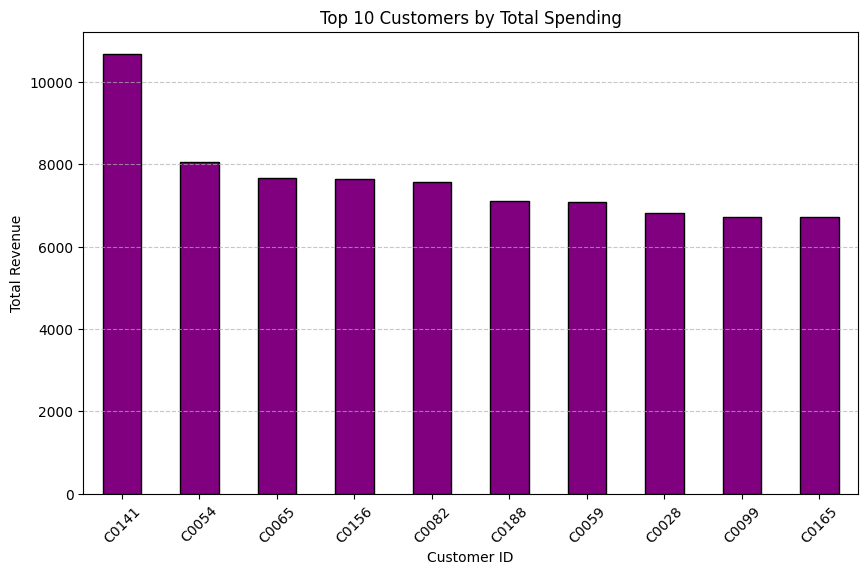

In [ ]:
customer_spending = dfCleaned.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Visualize top customers
plt.figure(figsize=(10, 6))
customer_spending.plot(kind='bar', color='purple', edgecolor='k')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
region_revenue, category_revenue, customer_spending

(Region
 South America    219352.56
 Europe           166254.63
 North America    152313.40
 Asia             152074.97
 Name: TotalValue, dtype: float64,
 Category
 Books          192147.47
 Electronics    180783.50
 Clothing       166170.66
 Home Decor     150893.93
 Name: TotalValue, dtype: float64,
 CustomerID
 C0141    10673.87
 C0054     8040.39
 C0065     7663.70
 C0156     7634.45
 C0082     7572.91
 C0188     7111.32
 C0059     7073.28
 C0028     6819.57
 C0099     6715.72
 C0165     6708.10
 Name: TotalValue, dtype: float64)

<Figure size 1200x800 with 0 Axes>

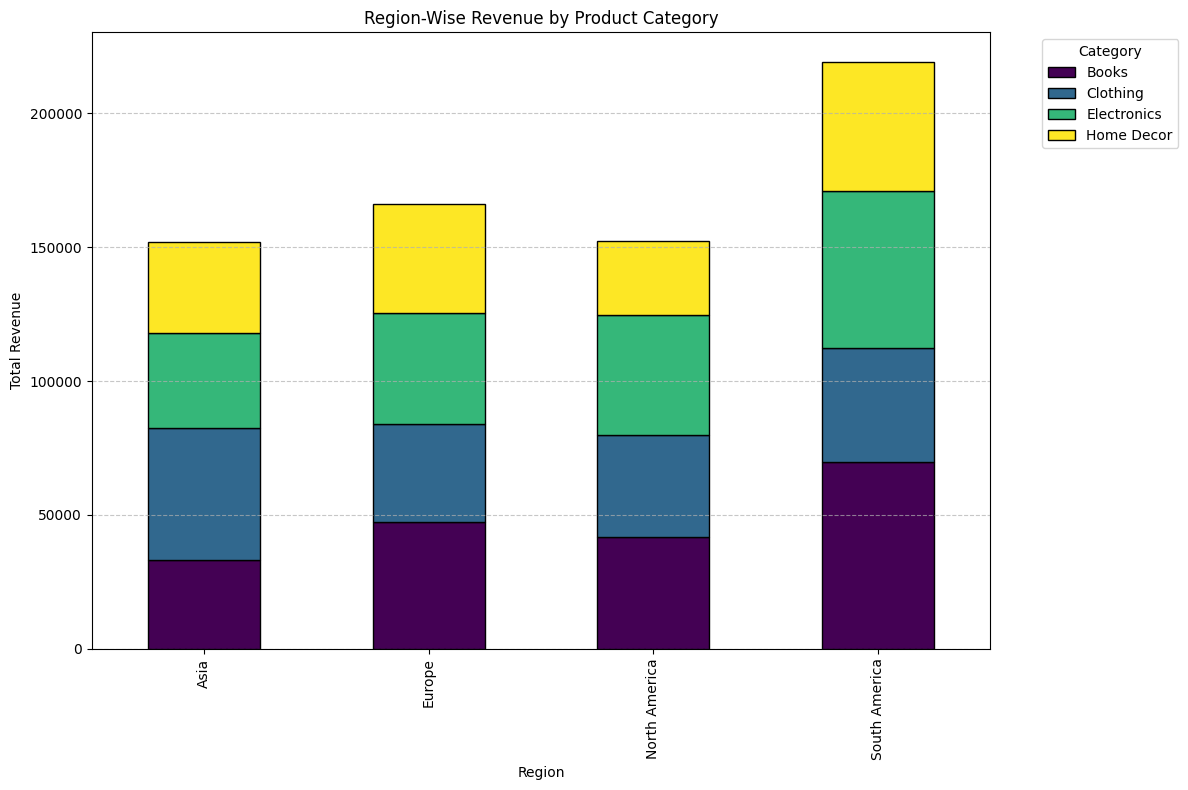

Category,Books,Clothing,Electronics,Home Decor
Region,,,,
Asia,33119.03,49353.09,35658.15,33944.70
Europe,47464.42,36335.59,41562.60,40892.02
North America,41811.99,38038.49,44716.43,27746.49
South America,69752.03,42443.49,58846.32,48310.72


In [ ]:
region_category_revenue = dfCleaned.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

plt.figure(figsize=(12, 8))
region_category_revenue.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', edgecolor='k')
plt.title('Region-Wise Revenue by Product Category')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

region_category_revenue

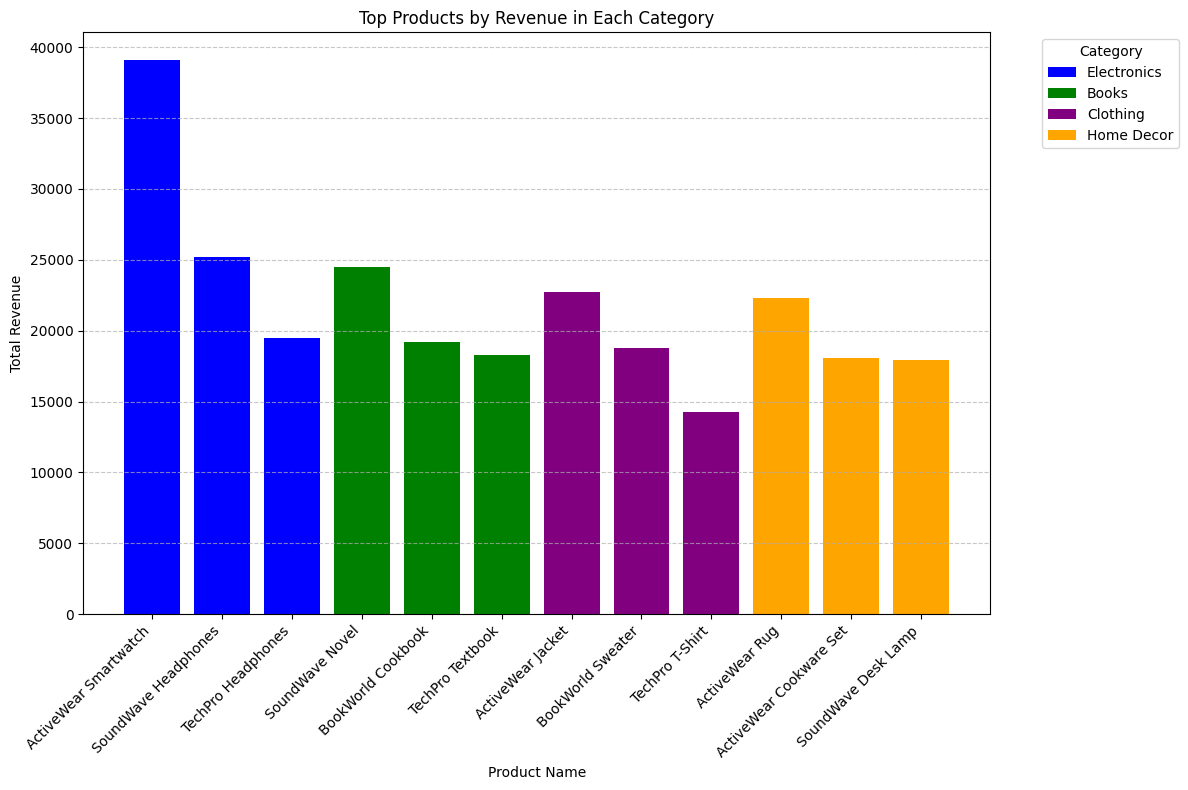

,Category,ProductName,TotalValue
0,Electronics,ActiveWear Smartwatch,39096.97
1,Electronics,SoundWave Headphones,25211.64
2,Books,SoundWave Novel,24507.90
3,Clothing,ActiveWear Jacket,22712.56
4,Home Decor,ActiveWear Rug,22314.43
5,Electronics,TechPro Headphones,19513.80
6,Books,BookWorld Cookbook,19221.99
7,Clothing,BookWorld Sweater,18743.79
8,Books,TechPro Textbook,18267.96
9,Home Decor,ActiveWear Cookware Set,18083.73


In [ ]:
top_products_by_category = dfCleaned.groupby(['Category', 'ProductName'])['TotalValue'].sum().sort_values(ascending=False)
top_products_by_category = top_products_by_category.groupby('Category').head(3).reset_index()

plt.figure(figsize=(12, 8))
categories = top_products_by_category['Category'].unique()
colors = ['blue', 'green', 'purple', 'orange']

for i, category in enumerate(categories):
    subset = top_products_by_category[top_products_by_category['Category'] == category]
    plt.bar(subset['ProductName'], subset['TotalValue'], color=colors[i % len(colors)], label=category)

plt.title('Top Products by Revenue in Each Category')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

top_products_by_category

# Lol

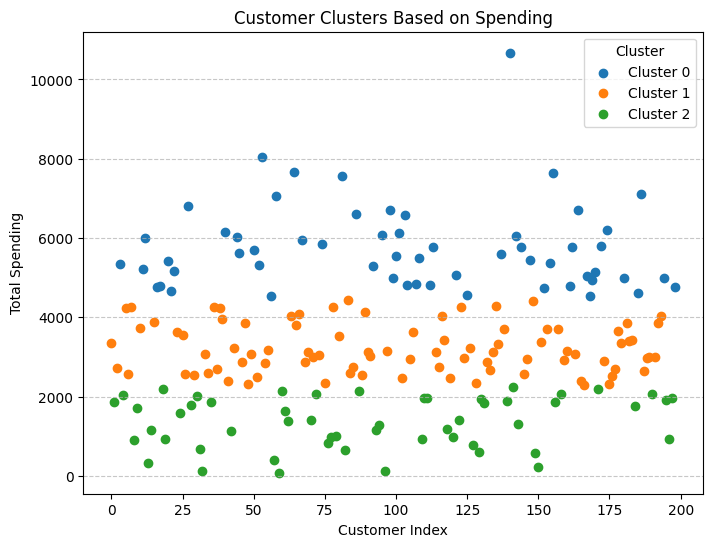

(array([[5754.03551724],
        [3227.22295455],
        [1363.50716981]]),
                 mean      min       max  count
 Cluster                                       
 0        5754.035517  4533.32  10673.87     58
 1        3227.222955  2300.42   4441.10     88
 2        1363.507170    82.36   2239.04     53)

In [ ]:
customer_spending = dfCleaned.groupby('CustomerID')['TotalValue'].sum().reset_index()

scaler = StandardScaler()
customer_spending_scaled = scaler.fit_transform(customer_spending[['TotalValue']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_spending['Cluster'] = kmeans.fit_predict(customer_spending_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

assert isinstance(customer_spending, pd.DataFrame), "customer_spending is not a DataFrame."

plt.figure(figsize=(8, 6))
for cluster in [0, 1, 2]:
    cluster_data = customer_spending[customer_spending['Cluster'] == cluster]
    plt.scatter(
        cluster_data.index,
        cluster_data['TotalValue'],
        label=f'Cluster {cluster}'
    )

plt.title('Customer Clusters Based on Spending')
plt.xlabel('Customer Index')
plt.ylabel('Total Spending')
plt.legend(title='Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cluster Summary
cluster_summary = customer_spending.groupby('Cluster')['TotalValue'].agg(['mean', 'min', 'max', 'count'])
cluster_centers, cluster_summary

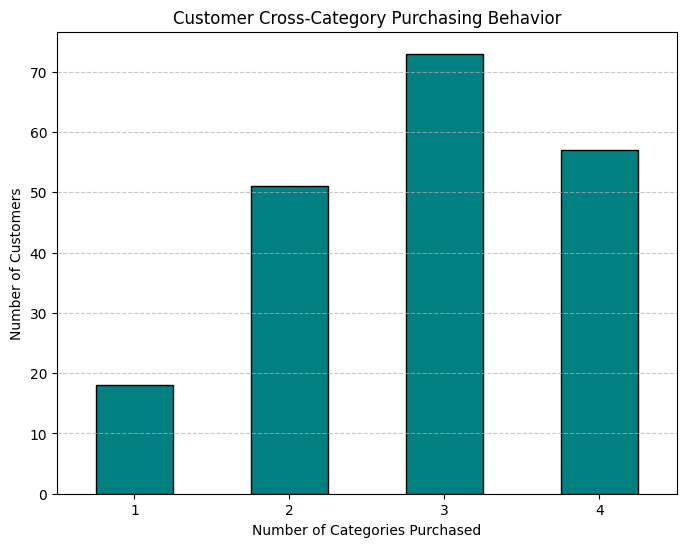

(CategoryCount
 3    73
 4    57
 2    51
 1    18
 Name: count, dtype: int64,
 Empty DataFrame
 Columns: [Books, Clothing, Electronics, Home Decor, CategoryCount]
 Index: [])

In [ ]:
category_purchases = dfCleaned.groupby(['CustomerID', 'Category'])['TotalValue'].sum().unstack().fillna(0)

# Add a column for total categories purchased
category_purchases['CategoryCount'] = (category_purchases > 0).sum(axis=1)

# Analyze cross-category trends
category_trend_summary = category_purchases['CategoryCount'].value_counts()

# Visualize cross-category purchasing behavior
plt.figure(figsize=(8, 6))
category_trend_summary.sort_index().plot(kind='bar', color='teal', edgecolor='k')
plt.title('Customer Cross-Category Purchasing Behavior')
plt.xlabel('Number of Categories Purchased')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

# Return customers who purchase across all categories
all_category_customers = category_purchases[category_purchases['CategoryCount'] == category_purchases.shape[1]]
category_trend_summary, all_category_customers

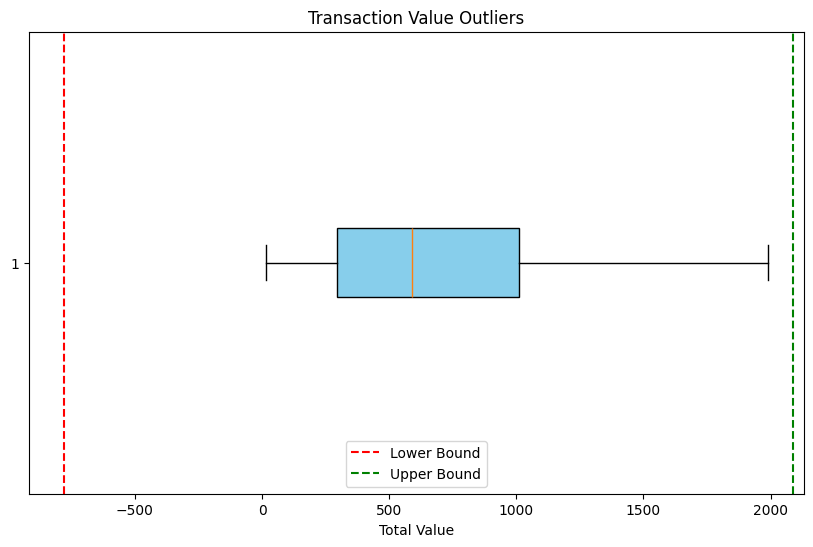

({'Outlier Count': 0,
  'Highest Outlier': nan,
  'Lowest Outlier': nan,
  'Outlier Percentage': 0.0},
 Empty DataFrame
 Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price_x, ProductName, Category, Price_y, CustomerName, Region, SignupDate, TransactionMonth]
 Index: [])

In [ ]:
q1 = dfCleaned['TotalValue'].quantile(0.25)
q3 = dfCleaned['TotalValue'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = dfCleaned[(dfCleaned['TotalValue'] < lower_bound) | (dfCleaned['TotalValue'] > upper_bound)]

# Visualize distribution with outliers
plt.figure(figsize=(10, 6))
plt.boxplot(dfCleaned['TotalValue'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Transaction Value Outliers')
plt.xlabel('Total Value')
plt.legend()
plt.show()

# Outlier details
outliers_summary = {
    "Outlier Count": len(outliers),
    "Highest Outlier": outliers['TotalValue'].max(),
    "Lowest Outlier": outliers['TotalValue'].min(),
    "Outlier Percentage": len(outliers) / len(dfCleaned) * 100,
}
outliers_summary, outliers.head()